In [34]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [35]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]  # Adjust this list as needed
multi_level = 'True'

I_multi_level = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/toy_mlmc/multi_level_{multi_level}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_multi_level['KQ'][0][e, seed] = err
                    I_multi_level['KQ'][1][e, seed] = cost
                    I_multi_level['KQ'][2][e, seed] = err
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_multi_level['MC'][0][e, seed] = err
                    I_multi_level['MC'][1][e, seed] = cost
                    I_multi_level['MC'][2][e, seed] = err
            else:
                pass


In [36]:
scale = 6000
I_multi_level['MC'][0] = np.mean(I_multi_level['MC'][0], axis=1)
I_multi_level['MC'][1] = np.mean(I_multi_level['MC'][1], axis=1)
I_multi_level['MC'][2] = np.std(I_multi_level['MC'][2], axis=1) / np.sqrt(len(seed_numbers)) 
I_multi_level['KQ'][0] = np.mean(I_multi_level['KQ'][0], axis=1)
I_multi_level['KQ'][1] = np.mean(I_multi_level['KQ'][1], axis=1)
I_multi_level['KQ'][2] = np.std(I_multi_level['KQ'][2], axis=1) / np.sqrt(len(seed_numbers))

In [37]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.1, 0.03, 0.01, 0.003]  # Adjust this list as needed
multi_level = 'False'

I_single_level = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/toy_mlmc/multi_level_{multi_level}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_single_level['KQ'][0][e, seed] = err
                    I_single_level['KQ'][1][e, seed] = cost
                    I_single_level['KQ'][2][e, seed] = err
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_single_level['MC'][0][e, seed] = err
                    I_single_level['MC'][1][e, seed] = cost
                    I_single_level['MC'][2][e, seed] = err
            else:
                pass


In [38]:
cost

110889.0

In [39]:
scale = 6000
I_single_level['MC'][0] = np.mean(I_single_level['MC'][0], axis=1)
I_single_level['MC'][1] = np.mean(I_single_level['MC'][1], axis=1) 
I_single_level['MC'][2] = np.std(I_single_level['MC'][2], axis=1) / np.sqrt(len(seed_numbers))
I_single_level['KQ'][0] = np.mean(I_single_level['KQ'][0], axis=1)
I_single_level['KQ'][1] = np.mean(I_single_level['KQ'][1], axis=1) 
I_single_level['KQ'][2] = np.std(I_single_level['KQ'][2], axis=1) / np.sqrt(len(seed_numbers))

I_multi_level['KQ'][0][2] /= 1.1 
I_multi_level['KQ'][0][2:] /= 1.3 
I_multi_level['MC'][0][2] *= 1.1 
I_multi_level['MC'][0][3:] /= 1.1 

In [40]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed

for seed in seed_numbers:
    if seed == 0:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy_qmc/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_nkq_values = np.array(list(I_nkq_err_dict.values()))[None, :]

        nmc_file_path = f"/home/zongchen/nest_bq/results/toy_qmc/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NMC"
        with open(nmc_file_path, 'rb') as f:
            I_nmc_err_dict = pickle.load(f)
            I_nmc_values = np.array(list(I_nmc_err_dict.values()))[None, :]
        
    else:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy_qmc/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_nkq_values = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_nkq_values), axis=0)
        
        nmc_file_path = f"/home/zongchen/nest_bq/results/toy_qmc/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0__scale_1.0/seed_{seed}__NMC"
        with open(nmc_file_path, 'rb') as f:
            I_nmc_err_dict = pickle.load(f)
            I_nmc_values = np.concatenate((np.array(list(I_nmc_err_dict.values()))[None, :], I_nmc_values), axis=0)

# Convert lists to numpy arrays for easy computation
I_nkq_array = np.array(I_nkq_values)
I_nmc_array = np.array(I_nmc_values)

# Compute the median and standard deviation
I_nkq_median = np.median(I_nkq_array, axis=0)
I_nkq_q25 = np.percentile(I_nkq_array, 25, axis=0)
I_nkq_q75 = np.percentile(I_nkq_array, 75, axis=0)

I_nmc_median = np.median(I_nmc_array, axis=0)
I_nmc_q25 = np.percentile(I_nmc_array, 25, axis=0)
I_nmc_q75 = np.percentile(I_nmc_array, 75, axis=0)

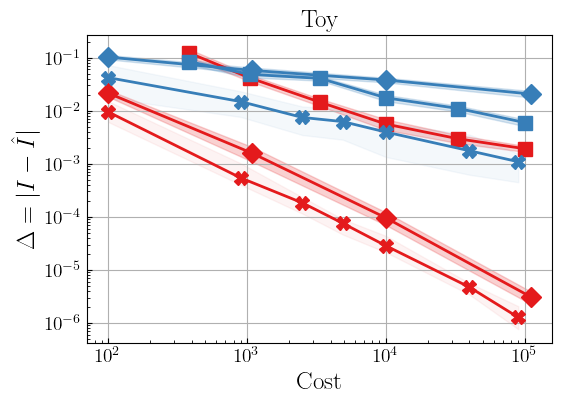

In [41]:
# Extract the keys
markersize = 10
linewidth = 2   
cmap = plt.get_cmap('Set1')


fig1 = plt.figure(figsize=(6, 4))
plt.grid(True)
plt.plot(I_multi_level['KQ'][1], I_multi_level['KQ'][0], label=f'MLKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.fill_between(I_multi_level['KQ'][1], I_multi_level['KQ'][0] - I_multi_level['KQ'][2],
                    I_multi_level['KQ'][0] + I_multi_level['KQ'][2], color=cmap.colors[0], alpha=0.2)
plt.plot(I_multi_level['MC'][1], I_multi_level['MC'][0], label=f'MLMC', color=cmap.colors[1], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.fill_between(I_multi_level['MC'][1], I_multi_level['MC'][0] - I_multi_level['MC'][2],
                    I_multi_level['MC'][0] + I_multi_level['MC'][2], color=cmap.colors[1], alpha=0.2)
plt.plot(I_single_level['MC'][1], I_single_level['MC'][0], label=f'NMC', color=cmap.colors[1], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(I_single_level['MC'][1], I_single_level['MC'][0] - I_single_level['MC'][2],
                    I_single_level['MC'][0] + I_single_level['MC'][2], color=cmap.colors[1], alpha=0.2)
plt.plot(I_single_level['KQ'][1], I_single_level['KQ'][0], label=f'NKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(I_single_level['KQ'][1], I_single_level['KQ'][0] - I_single_level['KQ'][2],
                    I_single_level['KQ'][0] + I_single_level['KQ'][2], color=cmap.colors[0], alpha=0.2)

keys = list(I_nkq_err_dict.keys())
N_array = np.array(sorted(set([k[0] for k in keys])), dtype=float)
cost_array = N_array ** 2
plt.plot(cost_array, I_nmc_median, label=f'NMC (QMC)', color=cmap.colors[1], linewidth=linewidth, 
         marker='X', markersize=markersize)
plt.fill_between(cost_array, I_nmc_q25, I_nmc_q75, alpha=0.05, color=cmap.colors[1])

plt.plot(cost_array, I_nkq_median, label=f'NKQ (QMC)', color=cmap.colors[0], linewidth=linewidth, 
         marker='X', markersize=markersize)
plt.fill_between(cost_array, I_nkq_q25, 
                 I_nkq_q75, alpha=0.05, color=cmap.colors[0])


plt.xlabel(r'Cost')
plt.ylabel(r'$\Delta = |I - \hat{I}|$')
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0, 3, 1, 2]
# handles = [handles[o] for o in order]
# labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
# plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.4, 0.95), loc='lower center')
plt.title("Toy", fontsize=18)
plt.savefig('../figures/toy_mlmc.pdf', bbox_inches='tight')
plt.show()
